# Reinforcement Learning

First step: Import the environment into a variable

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
env = gym.make("MountainCar-v0")
env.reset();

Second step: Understand the action/state spaces

In [2]:
print("Highest Observation space:",env.observation_space.high)
print("Lowest Observation space:", env.observation_space.low)
print("Number of actions possible:", env.action_space.n)

Highest Observation space: [0.6  0.07]
Lowest Observation space: [-1.2  -0.07]
Number of actions possible: 3


Most interesting part of the observation space: we are using coordinates, meaning that it is continuous.

Third step: Decide the algorithm that we want to use, alongside assumptions.

We will be using QLearning, and for QLearning to work we need to go from a continuous to discrete. We will be using different number of bins, and put observations inside bins.

In [3]:
numberOfBins = [20]
osSize = numberOfBins * len(env.observation_space.high) 
binSize = (env.observation_space.high - env.observation_space.low)/osSize

[0.09  0.007]


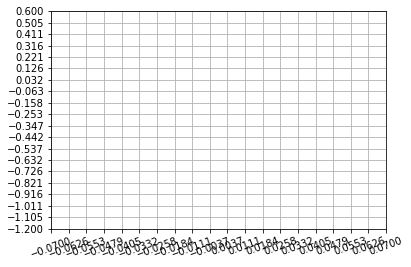

In [6]:
xRange = np.linspace(env.observation_space.low[1], env.observation_space.high[1],osSize[0])
yRange = np.linspace(env.observation_space.low[0], env.observation_space.high[0],osSize[1])
plt.xticks(xRange, rotation = 20)
plt.yticks(yRange)
plt.xlim([min(xRange), max(xRange)])
plt.ylim([min(yRange), max(yRange)])
plt.grid()
print(binSize)

Training the Agent

In [12]:
def get_discrete_state(state):
    """
    Helper function used to put state into bins
    """
    discreteState = (state - env.observation_space.low)/binSize
    return tuple(discreteState.astype(np.int))

# Define variables
numEpisodes = 25_000
epsilon = 1
epsilonDecay = 0.99//(25_000 - 100)
discountFactor = 0.95
learningRate = 0.1


# Define the Q-table
qTable = np.zeros(shape = (osSize + [env.action_space.n])) # number of Spaces x number of actions

In [13]:
rewardsPerEpisode = []
for episodeNum in range(numEpisodes):
    done = False
    state = env.reset()
    episodeReward= 0
    while not done:
        transformedState = get_discrete_state(state)        
        #Taking action logic
        if np.random.rand() < epsilon:
        	action = np.argmax(qTable[transformedState])
        else:
            action = env.action_space.sample()
        
        #Interacting with the environment
        new_state, reward, done, _ = env.step(action)
        
        #Update qTable
        newDiscreteState = get_discrete_state(new_state)
        
        if not done:
         	maxFutureQ = np.max(qTable[newDiscreteState])
         	currentQ = qTable[transformedState + (action,)]
         	newQ = (1-learningRate) * currentQ +  learningRate* (reward + discountFactor * maxFutureQ)
         	qTable[transformedState + (action,)] = newQ
         	episodeReward += reward
        elif new_state[0] >= env.goal_position:
        	qTable[transformedState + (action,)]  = 0

        state = new_state
    epsilon -= epsilonDecay
    rewardsPerEpisode.append(episodeReward)
env.close()

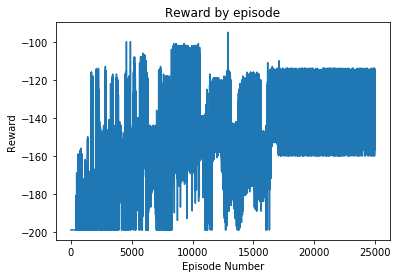

In [14]:
plt.plot(range(numEpisodes), rewardsPerEpisode);
plt.title('Reward by episode');
plt.xlabel('Episode Number');
plt.ylabel('Reward');
plt.savefig('Image.png')